# Climate AI

## This model uses a CNN to classify anomalies in PV cells

Upload an infrared image of a PV cell and see what the model predicts

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pandas as pd
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import clear_output

In [2]:
model = tf.keras.models.load_model('saved_model/CNN_1')

In [3]:
classes = {0: 'Cell', 1: 'Cell-Multi', 2: 'Cracking', 3: 'Diode', 4: 'Diode-Multi', 5: 'Hot-Spot', 6: 'Hot-Spot-Multi', 7: 'No-Anomaly', 8: 'Offline-Module', 9: 'Shadowing', 10: 'Soiling', 11: 'Vegetation'}

In [8]:
def predict(model, image):
    data = image/255
    pred_proba = model.predict(data.reshape(1, 40, 24, 1))
    plt.imshow(data)
    pred = np.argmax(pred_proba, axis = 1)
    pred = classes.get(pred[0])
    plt.title("Predicted: " + pred)
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.show()

FileUpload(value={'182.jpg': {'metadata': {'name': '182.jpg', 'type': 'image/jpeg', 'size': 524, 'lastModified…

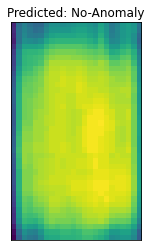

In [9]:
uploader = widgets.FileUpload(accept='image/*', multiple=False)

def _handle_upload(change):
    clear_output()
    display(uploader)
    w = change['owner']
    for name, file_info in uploader.value.items():
        image = io.BytesIO(file_info['content'])
    try:
        im1 = Image.open(image)
        im1_data = np.asarray(im1)
        predict(model, im1_data)
    except:
        print("Please upload a single-channel, 40x24 pixel image")

uploader.observe(_handle_upload, names='data')

display(uploader)